In [13]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_distribution
from qiskit.providers.fake_provider import FakeParis
import numpy as np, matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

This game of '2 Truths and a Lie: Quantum Edition' is sponsored by the *Quantum Lie Detector!* This setup consists of a 2 qubits in a joint enangled state $\ket{00}+\ket{01}+\ket{10}$ and given to Alice and Bob. Carol, being an external observer, makes 3 statements about the qubits. It is now up to Alice and Bob to then determine which statement is a lie.

In [20]:
qc_hardy = QuantumCircuit(2)
qc_hardy.initialize(np.array([1, 1, 1, 0]) / np.sqrt(3))
qc_hardy.measure_all()

def truth_lie(alice, bob) -> QuantumCircuit:
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)

    qc_hardy.initialize(np.array([1, 0, 1, 1]) / np.sqrt(3))

    if alice == 'x':
        qc.h(0)
    if bob == 'x':
        qc.h(1)
    
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    return qc

a = input('Alice\'s Basis of measurement (z/x for z/x basis): ')
b = input('Bob\'s Basis of measurement (z/x for z/x basis): ')

truth_lie = truth_lie(a, b)

simulator = AerSimulator()
job = simulator.run(truth_lie, shots = 1024)
counts = job.result().get_counts(truth_lie)

result = sorted(counts.keys())
guess = input('What do you think the result is? (00/01/10/11): ')
toggle = 0

for i in range(len(result)):
    if result[i] == guess:
        print('Statement was a Lie')
        print('There\'s a finite chance of the result', guess)
        toggle = 1

if toggle == 0:
    print('Statement was the Truth')
    print('There\'s no chance of the result', guess)

Statement was the Truth
There's no chance of the result 10


If Alice measures her qubit in the $x$ basis, and Bob measures his qubit in the $z$ basis, they can determine which statement is a lie.
- If the outcome of Alice's measurement is $0$, then the first statement is a lie. 
- If the outcome of Bob's measurement is $1$, then the second statement is a lie.
- If the outcome of Alice's measurement is $1$, then the third statement is a lie.

and so on for other combinations of bases.

Carol's Lies are the backbone of *Hardy's Paradox*, a quantum paradox that demonstrates quantum nonlocality, and a demonstration of the violation of *Bell's Inequality.*

# Alice and Bob measure in $z$ basis:

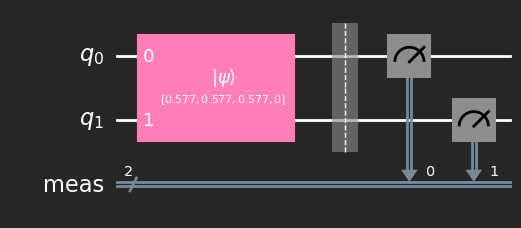

In [7]:
qc_hardy = QuantumCircuit(2)
qc_hardy.initialize(np.array([1, 1, 1, 0]) / np.sqrt(3))
qc_hardy.measure_all()

qc_hardy.draw('mpl', style = 'iqx-dark')

We can create our entangled joint state as

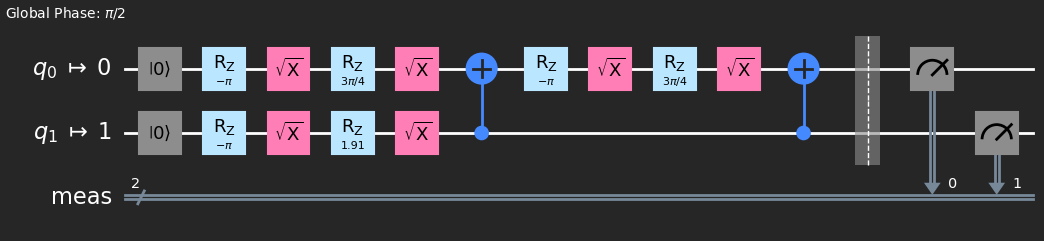

In [11]:
backend_sim = simulator.from_backend(FakeParis())
transpile(qc_hardy, backend_sim).draw('mpl', style = 'iqx-dark', idle_wires = False)

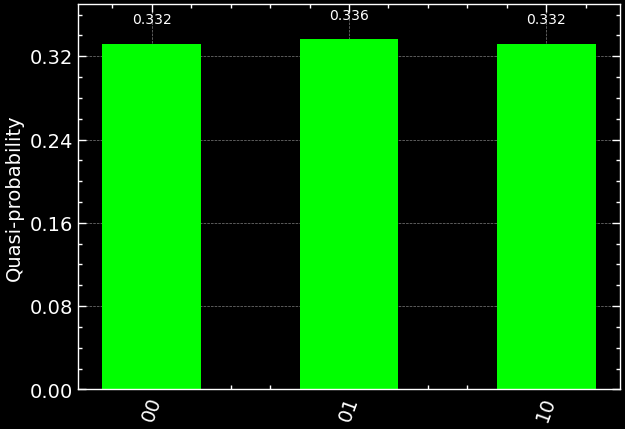

In [14]:
simulator = QasmSimulator()
job = simulator.run(qc_hardy, shots = 8000)
counts = job.result().get_counts(qc_hardy)

plot_distribution(counts, color = 'lime')

$\ket{11}$ is forbidden, as predicted.

# Alice measures in $z$ basis, Bob measures in $x$ basis:

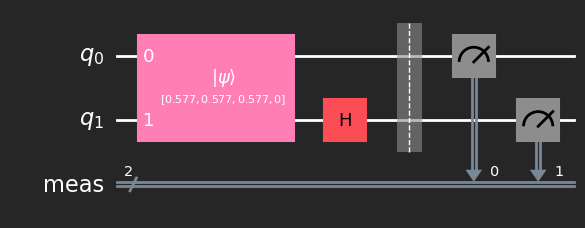

In [15]:
qc_hardy = QuantumCircuit(2)
qc_hardy.initialize(np.array([1, 1, 1, 0]) / np.sqrt(3))
qc_hardy.h(1)
qc_hardy.measure_all()

qc_hardy.draw('mpl', style = 'iqx-dark')

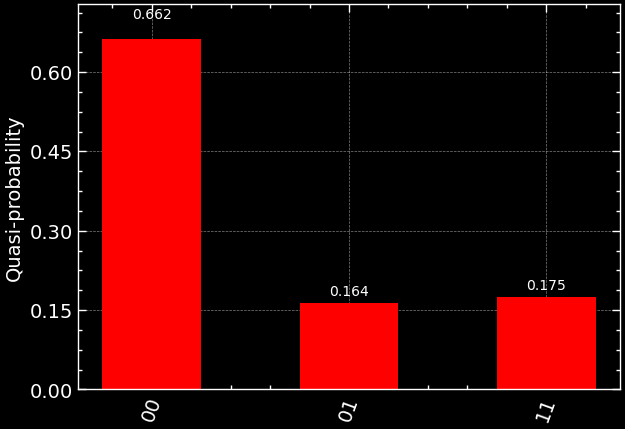

In [16]:
job = simulator.run(qc_hardy, shots = 8000)
counts = job.result().get_counts(qc_hardy)

plot_distribution(counts, color = 'red')

$\ket{01}$ is forbidden, as predicted.

# Alice measures in $x$ basis, Bob measures in $z$ basis:

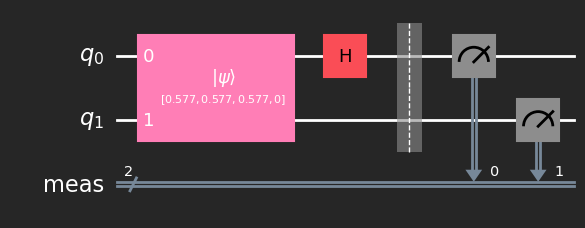

In [17]:
qc_hardy = QuantumCircuit(2)
qc_hardy.initialize(np.array([1, 1, 1, 0]) / np.sqrt(3))
qc_hardy.h(0)
qc_hardy.measure_all()

qc_hardy.draw('mpl', style = 'iqx-dark')

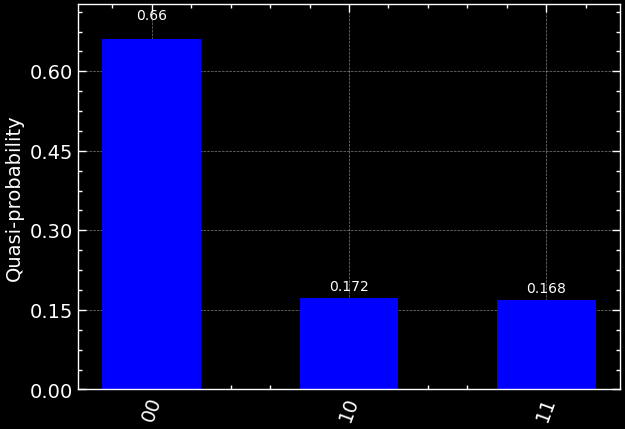

In [18]:
job = simulator.run(qc_hardy, shots = 8000)
counts = job.result().get_counts(qc_hardy)

plot_distribution(counts, color = 'blue')

$\ket{10}$ is forbidden, as predicted.

# Alice and Bob measure in $x$ basis:

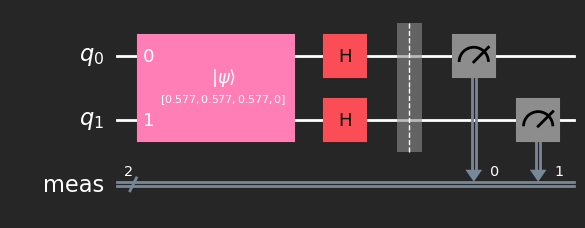

In [21]:
qc_hardy = QuantumCircuit(2)
qc_hardy.initialize(np.array([1, 1, 1, 0]) / np.sqrt(3))
qc_hardy.h(0)
qc_hardy.h(1)
qc_hardy.measure_all()

qc_hardy.draw('mpl', style = 'iqx-dark')

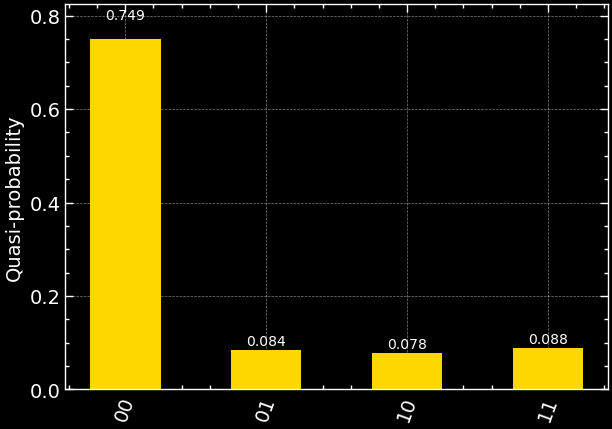

In [22]:
job = simulator.run(qc_hardy, shots = 8000)
counts = job.result().get_counts(qc_hardy)

plot_distribution(counts, color = 'gold')

Woah! This contradicts Carol's prediction of $\ket{00}$ being forbidden. This is the lie! Hardy argued that Carol made a simple classical assumption that the qubits are **independent,** which isn't the case here. Alice measuring her qubit in the $x$-basis **actually affects** Bob's qubit, and vice versa. This is a demonstration of quantum nonlocality.

Hardy's Paradox also clearly distinguishes entanglement and nonlocality. Entanglement is the property of the **joint state,** while nonlocality is the property of the **measurements.** In this case, the joint state is entangled, but the measurements are nonlocal. Also, more entanglement doesn't automatically imply more nonlocality.